In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Taxi-v2

In [2]:
import gym
env = gym.make("Taxi-v2")
n_actions = env.action_space.n

In [3]:
from qlearning import QLearningAgent
agent = QLearningAgent(alpha = 0.5, epsilon = 0.25, discount = 0.99, 
                       get_legal_actions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    total_reward= 0.0
    s = env.reset()
    for t in range(t_max):
        a = agent.get_action(s)
        next_s,r,done,_ = env.step(a)
        agent.update(s,a,r,next_s)
        s = next_s
        total_reward +=r
        if done: break
    return total_reward

eps= -2.9191091959171894e-05 mean reward= 6.5


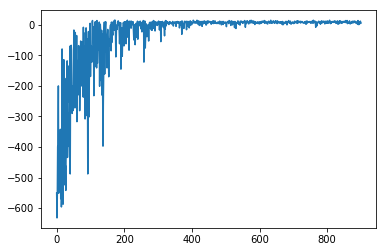

In [7]:
from IPython.display import clear_output
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    agent.epsilon *=-.99
    if i %100 ==0:
        clear_output(True)
        print('eps=',agent.epsilon,'mean reward=',np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()